In [1]:
# Import necessary libraries
import pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Define the file path
file_path = '/scratch/harvard/abaraban/df_merged.csv'

# Read the DataFrame from the CSV file
dtype_spec = {
    'crsp_obj_cd': 'string',
    'si_obj_cd': 'string',
    'wbrger_obj_cd': 'string',
    'policy': 'string',
    'lipper_asset_cd': 'string',
    'lipper_class': 'string',
    'lipper_obj_cd': 'string'
}
df_merged = pd.read_csv(file_path, dtype=dtype_spec)

# Display the first few rows of the DataFrame
df_merged

# Exclude rows where 'crsp_obj_cd' starts with 'I' or 'O'
excludes_i_o = ~df_merged['crsp_obj_cd'].str.startswith(('OM', 'OC', 'I'), na=False)

# Create a new DataFrame excluding the specified 'crsp_obj_cd' codes
df_merged = df_merged[excludes_i_o]
# df_merged = df_merged[df_merged['vanguard_VA'] > 10000]


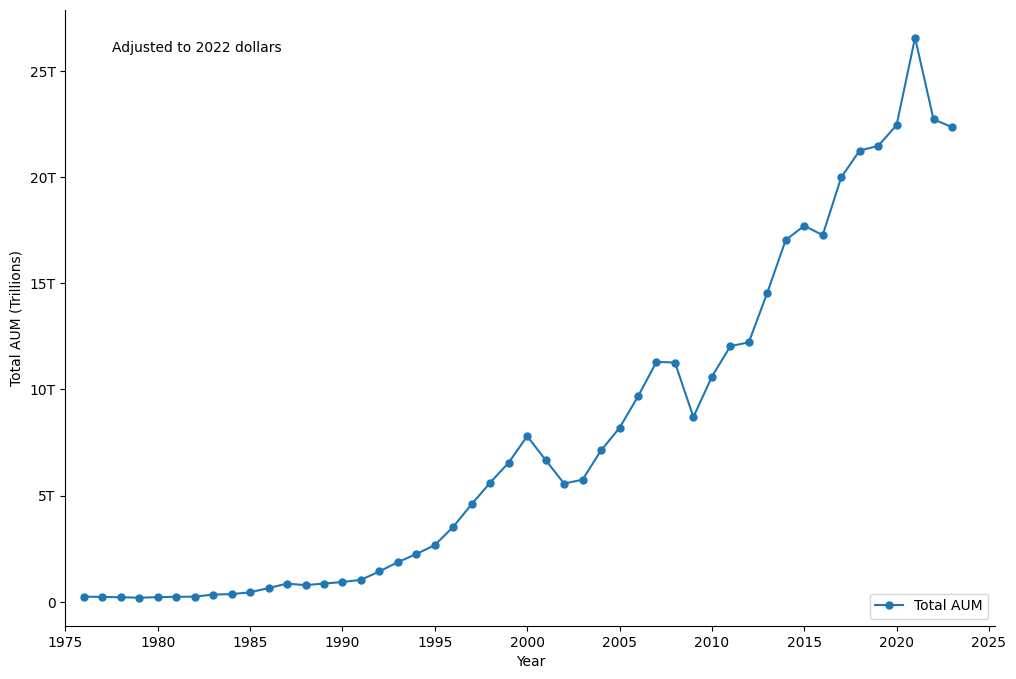

In [13]:
num_funds_each_year = df_merged.groupby('year')['crsp_fundno'].nunique()
mean_assets_per_fund = df_merged.groupby('year')['mtna_adj2022'].mean()
all_funds_FF_VA = df_merged.groupby('year')['ff_VA'].mean()
all_funds_vanguard_VA = df_merged.groupby('year')['vanguard_VA'].mean()
df_by_year = pd.DataFrame({
    'num_funds_each_year': num_funds_each_year,
    'mean_assets_per_fund': mean_assets_per_fund,
    'ff_monthly_mean_VA': all_funds_FF_VA,
    'vanguard_monthly_mean_VA': all_funds_vanguard_VA
}).reset_index()

df_by_year['total_aum_in_funds'] = df_by_year['num_funds_each_year'] * df_by_year['mean_assets_per_fund'] * 1000000
df_by_year['ff_VA_tot'] = df_by_year['ff_monthly_mean_VA'] * 12 * df_by_year['num_funds_each_year']
df_by_year['vanguard_VA_tot'] = df_by_year['vanguard_monthly_mean_VA'] * 12 * df_by_year['num_funds_each_year']

def billions(x, pos):
    if x == 0:
        return '0'
    return f'{x * 1e-9:.0f}B'  # convert to billions

def millions(x, pos):
    if x == 0:
        return '0'
    return f'{x * 1e-6:.0f}M'  # convert to millions

def trillions(x, pos):
    if x == 0:
        return '0'
    else:
        return f'{x * 1e-12:.0f}T'


# Create formatter
formatter = FuncFormatter(trillions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")
# plt.plot(df_by_year['year'], df_by_year['ff_VA_tot'], marker='o', markersize=5, label="FF_VA")
# plt.plot(df_by_year['year'], df_by_year['vanguard_VA_tot'], marker='o', markersize=5, label="Van_VA")
# plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Total AUM (Trillions)')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/total_aum_in_funds.pdf')
plt.show()

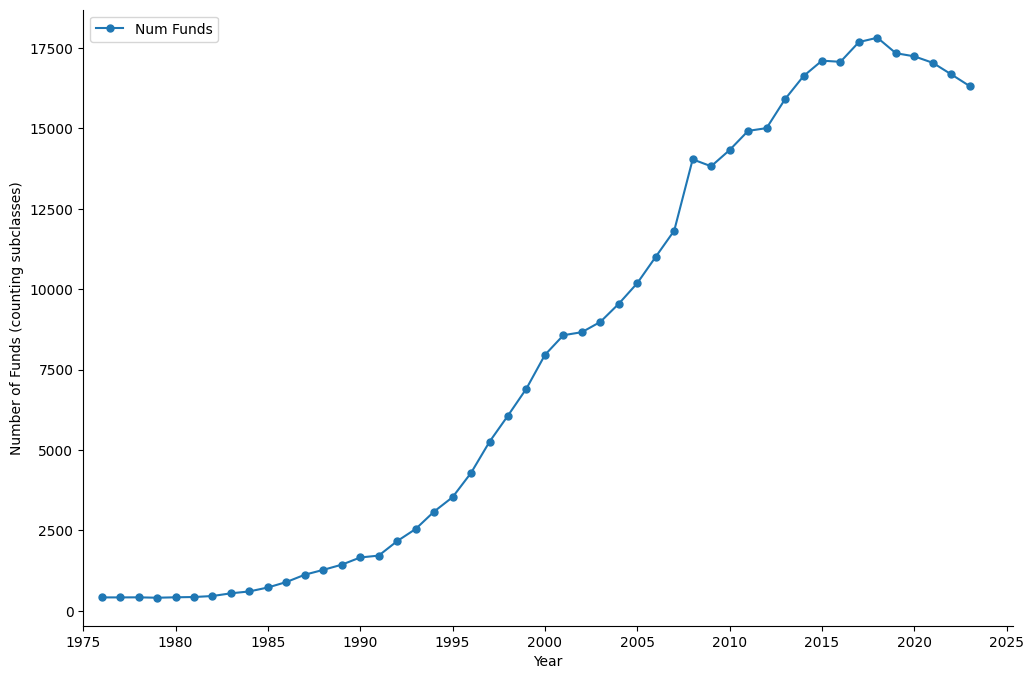

In [10]:
formatter = FuncFormatter(trillions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Number of Funds (counting subclasses)')
ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/num_funds_by_year.pdf')
plt.show()

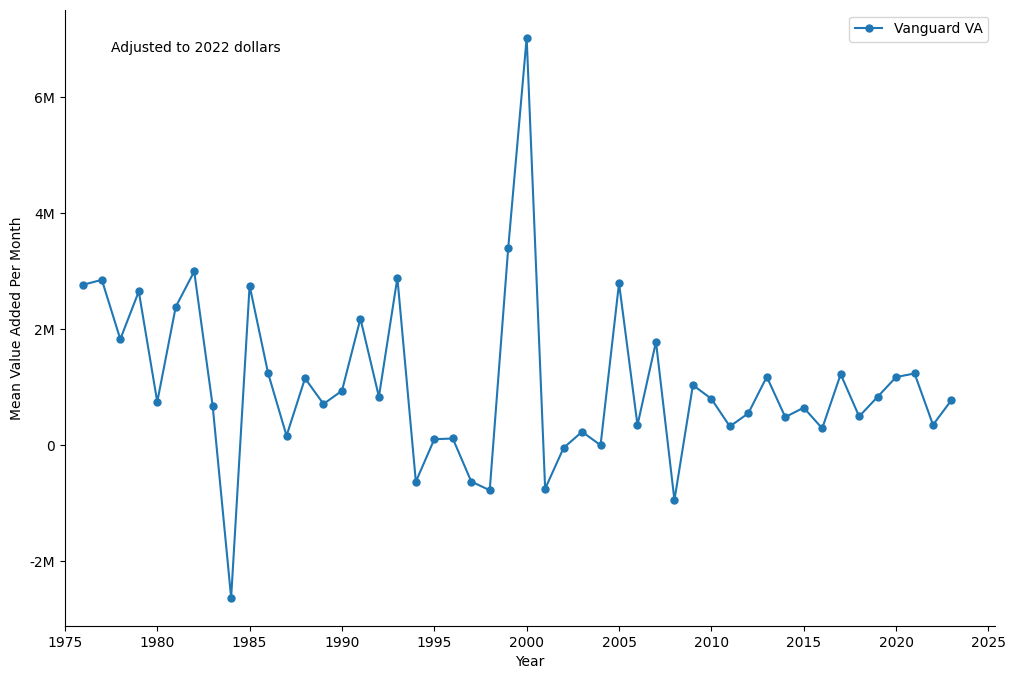

In [18]:
# Create formatter
formatter = FuncFormatter(millions)
plt.figure(figsize=(12, 8))
# plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")
# plt.plot(df_by_year['year'], df_by_year['ff_VA_tot'], marker='o', markersize=5, label="FF_VA")
plt.plot(df_by_year['year'], df_by_year['vanguard_monthly_mean_VA'], marker='o', markersize=5, label="Vanguard VA")
# plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Mean Value Added Per Month')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/mean_vanguard_VA_all_funds.pdf')
plt.show()

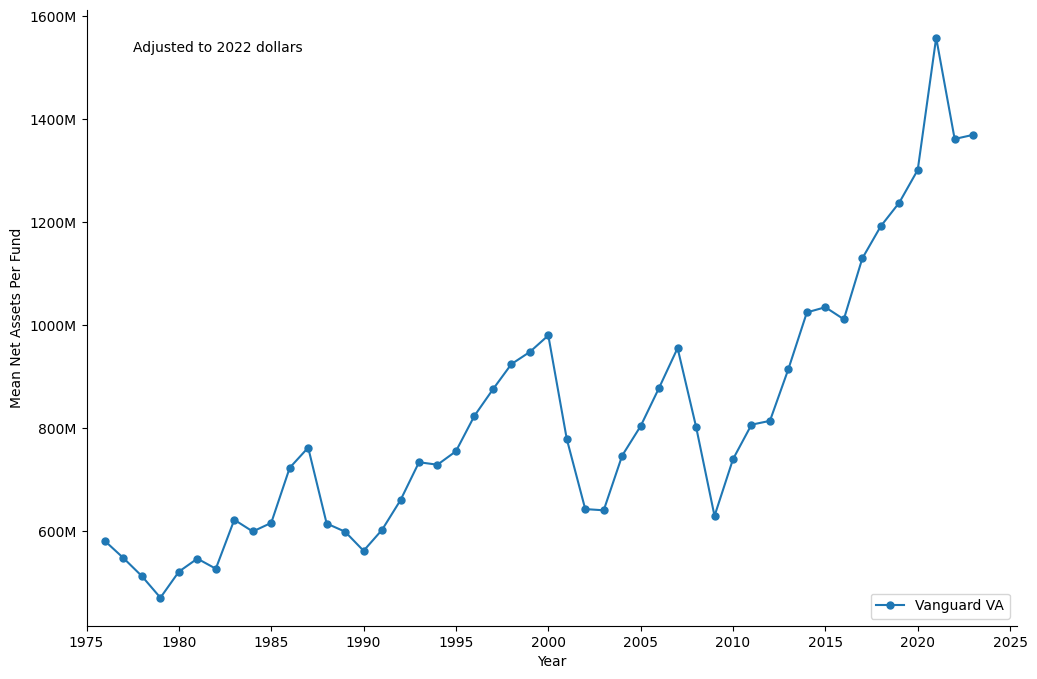

In [24]:
# Create formatter
formatter = FuncFormatter(millions)
plt.figure(figsize=(12, 8))
# plt.plot(df_by_year['year'], df_by_year['total_aum_in_funds'], marker='o', markersize=5, label="Total AUM")
# plt.plot(df_by_year['year'], df_by_year['ff_VA_tot'], marker='o', markersize=5, label="FF_VA")
plt.plot(df_by_year['year'], df_by_year['mean_assets_per_fund']*1000000, marker='o', markersize=5, label="Vanguard VA")
# plt.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label="Num Funds")

plt.xlabel('Year')
plt.ylabel('Mean Net Assets Per Fund')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/mean_net_assets_per_year_all_funds.pdf')
plt.show()

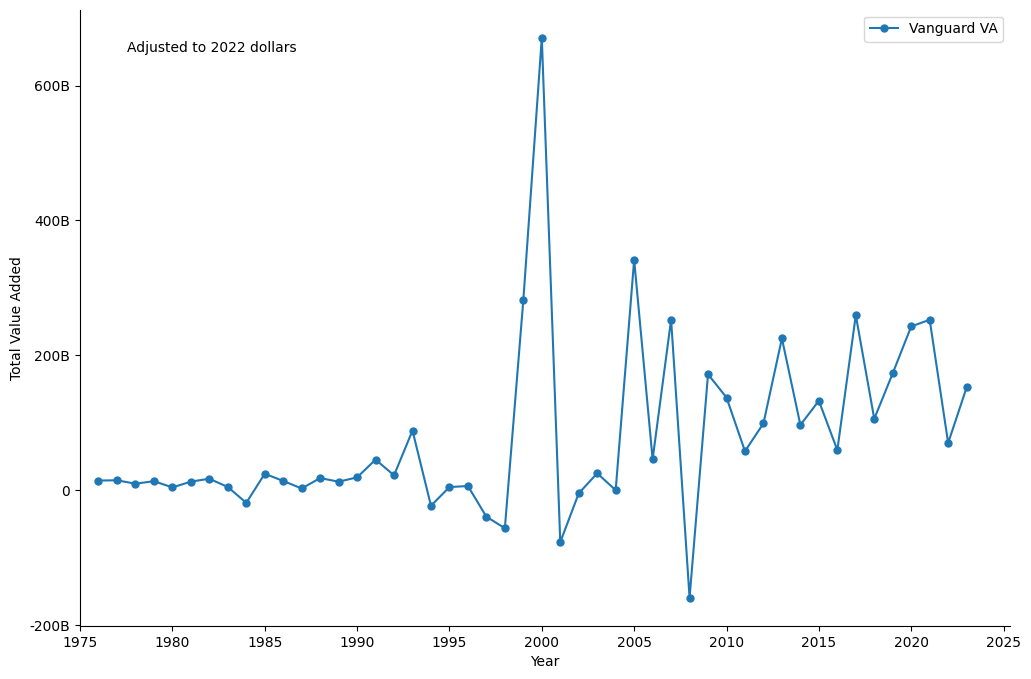

In [26]:
# Create formatter
formatter = FuncFormatter(billions)
plt.figure(figsize=(12, 8))
plt.plot(df_by_year['year'], df_by_year['vanguard_VA_tot'], marker='o', markersize=5, label="Vanguard VA")


plt.xlabel('Year')
plt.ylabel('Total Value Added')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=-500000000000)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1975)
plt.grid(False)
plt.legend()
plt.savefig('figures/vanguard_VA_all_funds.pdf')
plt.show()

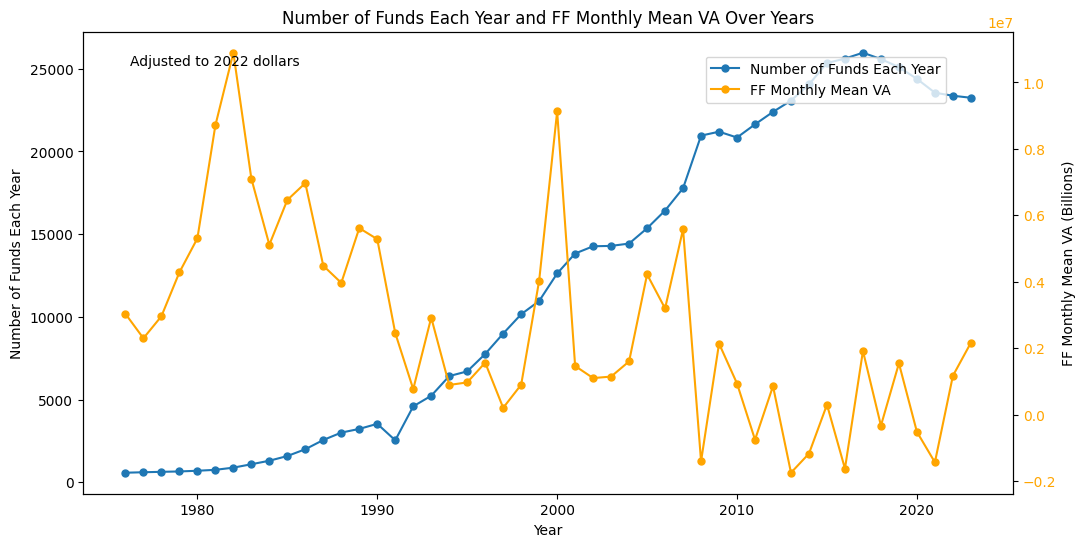

In [3]:
plt.close()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first series on ax1
ax1.plot(df_by_year['year'], df_by_year['num_funds_each_year'], marker='o', markersize=5, label='Number of Funds Each Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Funds Each Year')
ax1.tick_params(axis='y')
# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
ax2.plot(df_by_year['year'], df_by_year['ff_monthly_mean_VA'], marker='o', markersize=5, color='orange', label='FF Monthly Mean VA')
ax2.set_ylabel('FF Monthly Mean VA (Billions)')
ax2.tick_params(axis='y', labelcolor='orange')

# Add additional text
fig.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=ax1.transAxes,
         fontsize=10, verticalalignment='top', bbox=None) 

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85,0.85))
# Display the plot
plt.title('Number of Funds Each Year and FF Monthly Mean VA Over Years')
plt.show()

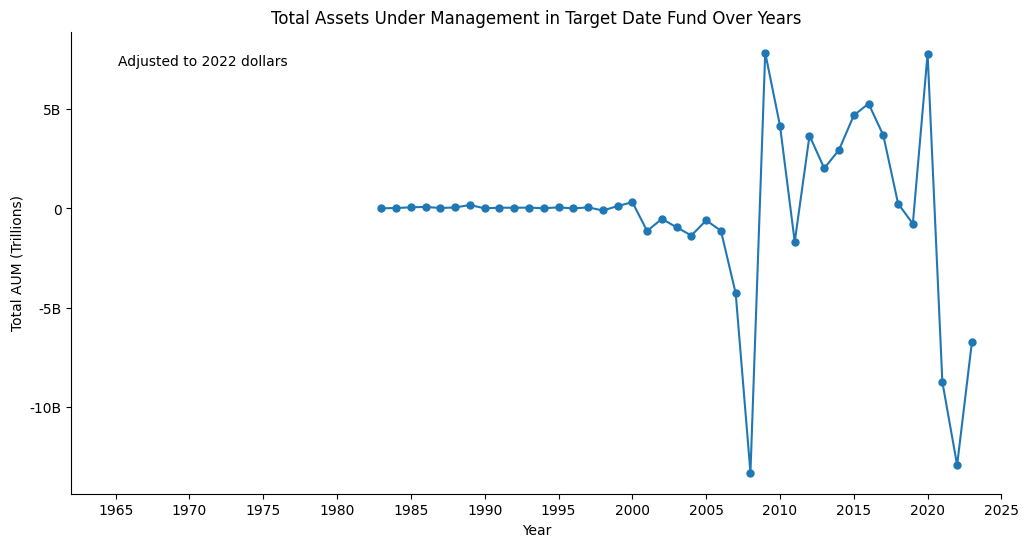

In [4]:
# Regex to match fund names with the word "target", a year between 1965 and 2099, or "retirement"
target_date_regex = r'\b(?:19[6-9]\d|20[0-9]{2})\b|\btarget\b|\bretirement\b'

# Regex to exclude fund names with the word "russell"
exclude_russell_regex = r'\brussell\b'

# Filter conditions
is_target_or_year = df_merged['fund_name'].str.contains(target_date_regex, na=False, regex=True)
is_crsp_obj_cd_mt = df_merged['crsp_obj_cd'] == 'MT'
excludes_russell = ~df_merged['fund_name'].str.contains(exclude_russell_regex, na=False, case=False, regex=True)
excludes_cd = ~df_merged['crsp_obj_cd'].str.startswith(('IG', 'IU', 'IF', 'IC', 'IUS', 'IUI'), na=False)

# Combine conditions
target_date_funds = df_merged[(is_target_or_year | is_crsp_obj_cd_mt) & excludes_russell & excludes_cd]
td_funds_each_year = target_date_funds.groupby('year')['crsp_fundno'].nunique()
td_funds_FF_VA = target_date_funds.groupby('year')['ff_VA'].mean()
td_funds_Vanguard_VA = target_date_funds.groupby('year')['vanguard_VA'].mean()

mean_assets_per_td = target_date_funds.groupby('year')['mtna_adj2022'].mean()
td_by_year = pd.DataFrame({
    'td_funds_each_year': td_funds_each_year,
    'mean_assets_per_fund': mean_assets_per_td,
    'ff_monthly_mean_VA': td_funds_FF_VA,
    'vanguard_monthly_mean_VA': td_funds_Vanguard_VA
}).reset_index()
td_by_year['total_aum_in_funds'] = td_by_year['td_funds_each_year'] * td_by_year['mean_assets_per_fund'] * 1000000
td_by_year['ff_VA_tot'] = td_by_year['ff_monthly_mean_VA'] * 12 * td_by_year['td_funds_each_year']
td_by_year['vanguard_VA_tot'] = td_by_year['vanguard_monthly_mean_VA'] * 12 * td_by_year['td_funds_each_year']
formatter = FuncFormatter(billions)

plt.figure(figsize=(12, 6))
# plt.plot(td_by_year['year'], td_by_year['total_aum_in_funds'], marker='o', markersize=5)
plt.plot(td_by_year['year'], td_by_year['vanguard_VA_tot'], marker='o', markersize=5)
plt.title('Total Assets Under Management in Target Date Fund Over Years')
plt.xlabel('Year')
plt.ylabel('Total AUM (Trillions)')
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_ylim(bottom=0)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1962)
plt.grid(False)

plt.savefig('figures/total_aum_in_tds.pdf')
plt.show()

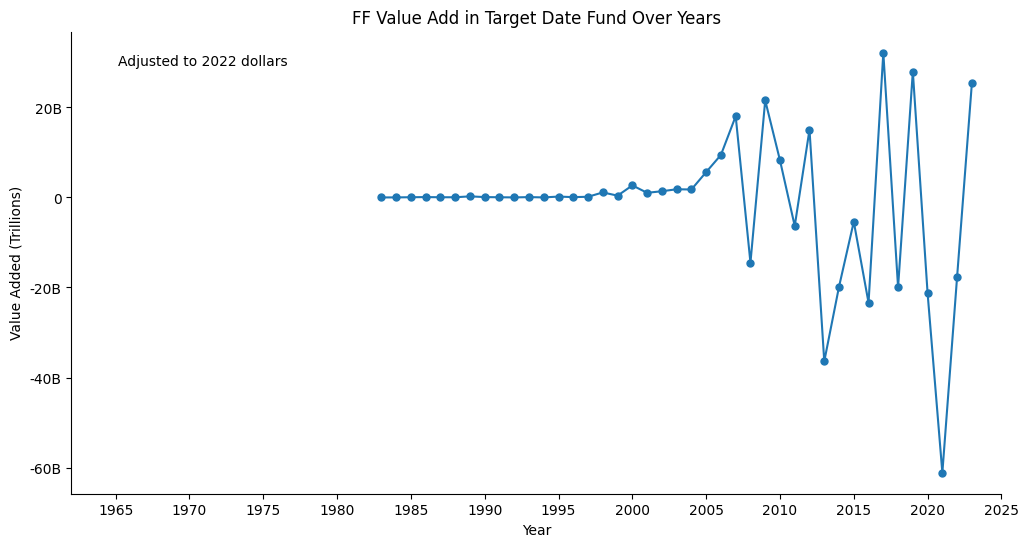

In [5]:
plt.close()
plt.figure(figsize=(12, 6))
plt.plot(td_by_year['year'], td_by_year['ff_VA_tot'], marker='o', markersize=5)
plt.title('FF Value Add in Target Date Fund Over Years')
plt.xlabel('Year')
plt.ylabel('Value Added (Trillions)')
plt.text(0.05, 0.95, 'Adjusted to 2022 dollars', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', bbox=None)

ax = plt.gca()
# Remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
formatter = FuncFormatter(billions)
plt.gca().yaxis.set_major_formatter(formatter)  # apply formatter

# Show left and bottom spines (axes)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xticks(range(1965, 2026, 5))
ax.set_xlim(left=1962)
plt.grid(False)

plt.savefig('figures/vanguard_va_in_tds.pdf')
plt.show()

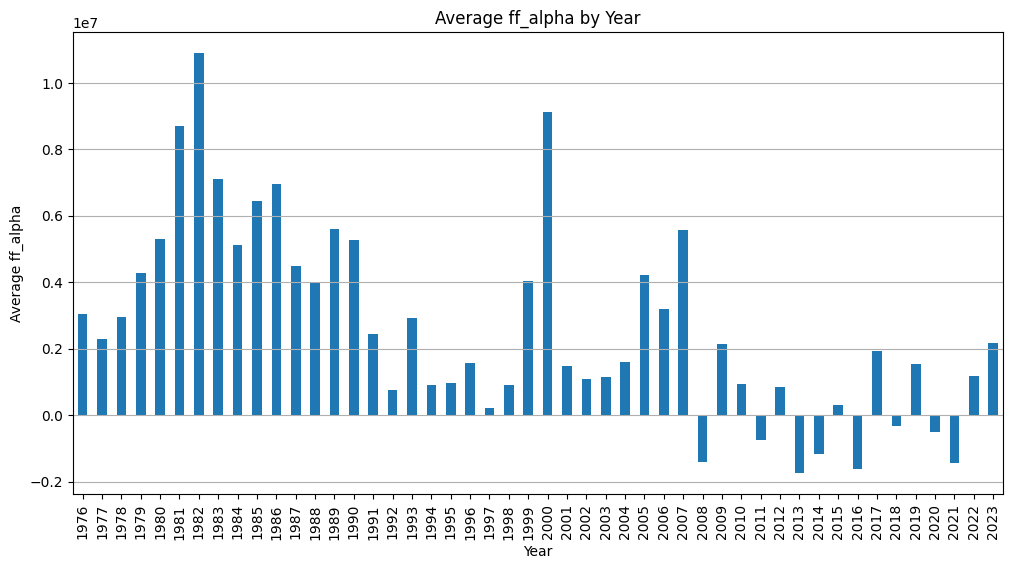

In [6]:
mean_ff_alpha_by_year = df_merged.groupby('year')['ff_VA'].mean()

# Plot the result in a bar chart
plt.figure(figsize=(12, 6))
mean_ff_alpha_by_year.plot(kind='bar')
plt.title('Average ff_alpha by Year')
plt.xlabel('Year')
plt.ylabel('Average ff_alpha')
plt.grid(axis='y')
plt.show()

In [7]:
df_merged['year_month'] = pd.to_datetime(df_merged[['year', 'month']].assign(day=1))

def check_missing_periods(group):
    # Generate a range of all months between the first and last entry
    all_months = pd.date_range(start=group['year_month'].min(), end=group['year_month'].max(), freq='MS')
    # Check the missing months
    missing_months = all_months.difference(group['year_month'])
    return missing_months

# Apply the function to each group and collect the results
missing_periods = df_merged.groupby('crsp_fundno').apply(check_missing_periods)

# Display the missing periods for each crsp_fundno
for fund, missing in missing_periods.items():
    if len(missing) > 0:
        print(f"Fund {fund} is missing the following periods:\n{missing}")
    else:
        print(f"Fund {fund} has no missing periods.")

/tmp/23321566.1.jupyterhub.q/ipykernel_1152140/38282367.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_periods = df_merged.groupby('crsp_fundno').apply(check_missing_periods)


Fund 1 has no missing periods.
Fund 2 has no missing periods.
Fund 3 has no missing periods.
Fund 4 has no missing periods.
Fund 5 is missing the following periods:
DatetimeIndex(['1984-01-01', '1984-02-01', '1984-03-01', '1984-04-01',
               '1984-05-01', '1984-06-01', '1984-07-01', '1984-08-01',
               '1984-09-01', '1984-10-01', '1984-11-01', '1985-01-01',
               '1985-02-01', '1985-03-01', '1985-04-01', '1985-05-01',
               '1985-06-01', '1985-07-01', '1985-08-01', '1985-09-01',
               '1985-10-01', '1985-11-01', '1986-01-01', '1986-02-01',
               '1986-03-01', '1986-04-01', '1986-05-01', '1986-06-01',
               '1986-07-01', '1986-08-01', '1986-09-01', '1986-10-01',
               '1986-11-01', '1987-01-01', '1987-02-01', '1987-03-01',
               '1987-04-01', '1987-05-01', '1987-06-01', '1987-07-01',
               '1987-08-01', '1987-09-01', '1987-10-01', '1987-11-01',
               '1988-01-01', '1988-02-01', '1988-03-01

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Fund 55426 is missing the following periods:
DatetimeIndex(['2013-01-01', '2018-06-01', '2023-06-01'], dtype='datetime64[ns]', freq=None)
Fund 55427 is missing the following periods:
DatetimeIndex(['2018-06-01', '2023-06-01'], dtype='datetime64[ns]', freq=None)
Fund 55428 is missing the following periods:
DatetimeIndex(['2018-06-01', '2023-06-01'], dtype='datetime64[ns]', freq=None)
Fund 55429 is missing the following periods:
DatetimeIndex(['2018-06-01', '2023-06-01'], dtype='datetime64[ns]', freq=None)
Fund 55430 is missing the following periods:
DatetimeIndex(['2015-11-01', '2018-06-01', '2023-06-01'], dtype='datetime64[ns]', freq=None)
Fund 55431 is missing the following periods:
DatetimeIndex(['2015-11-01', '2018-06-01'], dtype='datetime64[ns]', freq=None)
Fund 55432 is missing the following periods:
DatetimeIndex(['2015-11-01', '2018-06-01'], dtype='datetime64[ns]', freq=None)
Fund 55441 is missing the following periods:
DatetimeIndex(['2018-01-01', '2019-11-01', '2021-11-01'], d

In [8]:
df_merged[df_merged['crsp_fundno'] == 5]

crsp_fundno       caldt   mret    mtna  exp_ratio  \
99             5  1983-12-30  0.084  1265.6     0.0059   
100            5  1984-12-31  0.099  1825.5     0.0067   
101            5  1985-12-31  0.078  2103.2     0.0056   
102            5  1986-12-31  0.064  2412.9     0.0055   
103            5  1987-12-31  0.062  2110.9     0.0054   
104            5  1988-12-30  0.071  2654.2     0.0052   
105            5  1989-12-29  0.086  3443.4     0.0054   

                     fund_name     cma     hml   mktrf     umd  ...    rmw_ff  \
99   Active Assets Money Trust  0.0127  0.0173 -0.0178  0.0084  ...  0.006207   
100  Active Assets Money Trust -0.0136 -0.0026  0.0184  0.0149  ...  0.006207   
101  Active Assets Money Trust -0.0180 -0.0154  0.0388 -0.0023  ...  0.006207   
102  Active Assets Money Trust  0.0009  0.0036 -0.0327  0.0035  ...  0.006207   
103  Active Assets Money Trust -0.0242 -0.0443  0.0681  0.0587  ...  0.006207   
104  Active Assets Money Trust -0.0038 -0.0169  0.0149  0.0049  ...  0.006207   
105  Active Assets Money Trust  0.0142  0.0016  0.0116  0.0280  ...  0.006207   

     mktrf_ff    cma_ff  vanguard_return  vanguard_alpha   vanguard_VA  \
99   0.007452 -0.002146        -0.000074        0.084565  3.134903e+08   
100  0.007452 -0.002146         0.000300        0.099258  5.106084e+08   
101  0.007452 -0.002146         0.000552        0.077915  4.449091e+08   
102  0.007452 -0.002146        -0.000312        0.064770  4.197431e+08   
103  0.007452 -0.002146         0.000892        0.061558  3.342157e+08   
104  0.007452 -0.002146         0.000189        0.071245  4.657737e+08   
105  0.007452 -0.002146         0.000292        0.086158  6.982460e+08   

     ff_return  ff_alpha         ff_VA  year_month  
99   -0.000047  0.084539  3.133925e+08  1983-12-01  
100   0.000385  0.099174  5.101750e+08  1984-12-01  
101   0.000424  0.078043  4.456402e+08  1985-12-01  
102  -0.000179  0.064638  4.188835e+08  1986-12-01  
103   0.001403  0.061047  3.314381e+08  1987-12-01  
104   0.000264  0.071170  4.652827e+08  1988-12-01  
105   0.000286  0.086164  6.982917e+08  1989-12-01  

[7 rows x 54 columns]

In [9]:
df_by_year

year  num_funds_each_year  mean_assets_per_fund  ff_monthly_mean_VA  \
0   1976                  575            528.039943        3.033979e+06   
1   1977                  604            484.256453        2.297737e+06   
2   1978                  629            457.229155        2.960001e+06   
3   1979                  652            468.327478        4.281281e+06   
4   1980                  694            597.342387        5.304931e+06   
5   1981                  750            681.062011        8.705894e+06   
6   1982                  882            875.044399        1.089446e+07   
7   1983                 1087            927.044658        7.106682e+06   
8   1984                 1300            739.822489        5.112966e+06   
9   1985                 1584            747.176027        6.460452e+06   
10  1986                 1995            913.760492        6.970162e+06   
11  1987                 2554            931.306208        4.481380e+06   
12  1988                 3001            750.441166        3.965553e+06   
13  1989                 3224            733.759814        5.614089e+06   
14  1990                 3532            695.823284        5.281734e+06   
15  1991                 2535            475.105345        2.454091e+06   
16  1992                 4589            377.556249        7.659722e+05   
17  1993                 5228            383.354730        2.920696e+06   
18  1994                 6418            386.312511        8.917448e+05   
19  1995                 6703            414.524894        9.689032e+05   
20  1996                 7755            463.149113        1.563642e+06   
21  1997                 8989            516.615565        2.033234e+05   
22  1998                10157            557.615700        8.994754e+05   
23  1999                10959            590.919969        4.033234e+06   
24  2000                12624            630.789809        9.126934e+06   
25  2001                13830            489.920027        1.463160e+06   
26  2002                14268            400.965082        1.098975e+06   
27  2003                14290            404.388146        1.144268e+06   
28  2004                14432            495.513039        1.601582e+06   
29  2005                15356            540.763761        4.220662e+06   
30  2006                16428            592.660361        3.196238e+06   
31  2007                17779            645.901119        5.582361e+06   
32  2008                20958            521.464139       -1.408523e+06   
33  2009                21196            404.121963        2.139434e+06   
34  2010                20844            505.527374        9.346464e+05   
35  2011                21640            551.487572       -7.560851e+05   
36  2012                22394            547.466977        8.562475e+05   
37  2013                23076            633.239752       -1.750219e+06   
38  2014                24056            705.811595       -1.173955e+06   
39  2015                25349            701.256796        2.983709e+05   
40  2016                25617            673.052858       -1.627335e+06   
41  2017                25971            772.229871        1.916291e+06   
42  2018                25587            831.848601       -3.336537e+05   
43  2019                25098            855.927989        1.543098e+06   
44  2020                24389            905.984777       -5.200703e+05   
45  2021                23553           1123.398857       -1.437089e+06   
46  2022                23370            950.604232        1.167851e+06   
47  2023                23247            955.971841        2.162622e+06   

    vanguard_monthly_mean_VA  total_aum_in_funds     ff_VA_tot  \
0               3.188145e+06        3.036230e+11  2.093446e+10   
1               2.399796e+06        2.924909e+11  1.665400e+10   
2               1.493558e+06        2.875971e+11  2.234208e+10   
3               2.889663e+06        3.053495e+11  3.349675e+10  

In [20]:
df_by_year

year  num_funds_each_year  mean_assets_per_fund  ff_monthly_mean_VA  \
0   1976                  420            580.400642        2.717494e+06   
1   1977                  420            547.340150        2.764631e+06   
2   1978                  422            512.127469        3.634455e+06   
3   1979                  410            470.292855        4.563092e+06   
4   1980                  423            520.958312        4.452035e+06   
5   1981                  432            546.271850        6.749313e+06   
6   1982                  463            526.681616        6.690678e+06   
7   1983                  547            621.804712        4.803113e+06   
8   1984                  606            599.004865        2.432126e+06   
9   1985                  728            615.755679        5.816115e+06   
10  1986                  897            722.810556        5.077610e+06   
11  1987                 1125            762.042806        4.371444e+06   
12  1988                 1276            614.534922        2.969078e+06   
13  1989                 1437            598.586683        3.852546e+06   
14  1990                 1661            561.480445        3.674821e+06   
15  1991                 1719            602.247260        3.302751e+06   
16  1992                 2169            660.006119        1.326142e+06   
17  1993                 2546            733.618346        6.157777e+06   
18  1994                 3088            728.801185        1.921175e+06   
19  1995                 3535            754.972943        1.686950e+06   
20  1996                 4290            823.757071        2.915736e+06   
21  1997                 5257            875.191609        2.089240e+05   
22  1998                 6071            924.280137        1.655185e+06   
23  1999                 6912            947.982387        6.741922e+06   
24  2000                 7957            980.074312        1.487187e+07   
25  2001                 8570            778.849592        2.371403e+06   
26  2002                 8664            642.555753        1.869246e+06   
27  2003                 8983            640.212530        1.846472e+06   
28  2004                 9548            746.535045        2.488337e+06   
29  2005                10188            803.860829        6.502904e+06   
30  2006                11008            878.354922        4.792378e+06   
31  2007                11820            955.442294        8.601720e+06   
32  2008                14036            802.657292       -2.116019e+06   
33  2009                13821            629.269973        3.316311e+06   
34  2010                14326            739.545120        1.356036e+06   
35  2011                14921            806.587256       -1.194095e+06   
36  2012                15007            814.036107        1.275293e+06   
37  2013                15907            914.888578       -2.513514e+06   
38  2014                16624           1024.867396       -1.769554e+06   
39  2015                17104           1034.901766        4.665747e+05   
40  2016                17068           1011.457749       -2.463323e+06   
41  2017                17682           1129.785270        2.805673e+06   
42  2018                17817           1192.311301       -4.573142e+05   
43  2019                17336           1238.058482        2.215239e+06   
44  2020                17238           1301.629791       -8.169609e+05   
45  2021                17037           1558.684329       -1.983760e+06   
46  2022                16678           1361.901549        1.861314e+06   
47  2023                16312           1369.925995        3.095937e+06   

    vanguard_monthly_mean_VA  total_aum_in_funds     ff_VA_tot  \
0               2.767064e+06        2.437683e+11  1.369617e+10   
1               2.850100e+06        2.298829e+11  1.393374e+10   
2               1.826048e+06        2.161178e+11  1.840488e+10   
3               2.650841e+06        1.928201e+11  2.245041e+10  

In [ ]:
df_merged

In [ ]:
grouped = df_merged.groupby('year')

for year, group in grouped:
    plt.figure()
    plt.hist(group['vanguard_VA'], edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of vanguard_VA for Year {year}')
    plt.xlabel('vanguard_VA')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [ ]:
variance_per_year = df_merged.groupby('year')['vanguard_VA'].std().reset_index()
mean_per_year = df_merged.groupby('year')['vanguard_VA'].mean().reset_index()

# Rename columns for clarity
variance_per_year.columns = ['year', 'vanguard_VA_variance']
mean_per_year.columns = ['year', 'vanguard_VA_mean']

# Plot the variance and mean by year
plt.figure(figsize=(10, 6))

# Plot variance
plt.plot(variance_per_year['year'], variance_per_year['vanguard_VA_variance'], marker='o', linestyle='-', color='b', label='Variance')

# Plot mean
plt.plot(mean_per_year['year'], mean_per_year['vanguard_VA_mean'], marker='x', linestyle='--', color='r', label='Mean')

plt.title('Variance and Mean of vanguard_VA by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
variance_per_year

In [1]:
!mkdir insider_trades